# **Xử lý dữ liệu**

**Thêm thư viện**

In [1]:
import pandas as pd
import statistics as sta
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

**Đọc dữ liệu từ file csv và in ra vài dòng đầu**

In [2]:
csv = "output.csv"
data = pd.read_csv(csv)

**Xử lý và chuyển giá sản phẩm thành dạng số thực**

In [3]:
price = data["p_price"]
new_price = []
for item in price:
    item = str(item)
    if "." in item:
        item = item.replace(".","") # Xóa dấu chấm trong giá tiền
    if item[-1]=="₫":   # Xóa kí tự ₫ trong giá tiền
        item = item.replace("₫","")
    item = item.strip()     # Loại bỏ khoảng trắng trước và sau giá tiền
    new_price.append(int(item))   # Chuyển giá tiền về kiểu dữ liệu số nguyên
data["p_price"] = new_price

**Lọc và phân chia các khoảng giá tiền của sản phẩm**

In [4]:
price_cate = data["p_price"]
# Phân loại và thống kê giá trị của các sản phẩm
list_cate = ["Sản phẩm có giá từ 0 - dưới 10k","Sản phẩm có giá từ 10k - dưới 100k","Sản phẩm có giá từ 100k - dưới 1tr","Sản phẩm có giá từ 1tr - 10tr","Sản phẩm có giá từ trên 10tr"]
count_list_cate = [0, 0, 0, 0, 0]
percent = []
for item in price_cate:
    if item<10000:
        count_list_cate[0] = count_list_cate[0] +1
    elif item<100000:
        count_list_cate[1] = count_list_cate[1] +1
    elif item<1000000:
        count_list_cate[2] = count_list_cate[2] +1
    elif item<10000000:
        count_list_cate[3] = count_list_cate[3] +1
    else:
        count_list_cate[4] = count_list_cate[4] +1
# Tính phần trăm
for item in count_list_cate:
    item = item/len(price_cate)*100
    percent.append(round(item,2))

**Hàm tạo bảng thống kê và vẽ Barplot**

In [5]:
def stat_table(a,title_plt):
    x = data.groupby(a)[a].count()
    dt = pd.DataFrame(x)
    dt.columns = ['Percent']
    percent = []
    for i in dt['Percent']:
        x = (i/len(data[a]))*100
        percent.append(round(x))
    dt['Percent'] = percent
    print(dt)
    mylabels = dt.index
    fig = plt.figure(figsize = (3, 6))
    # Barplot
    plt.title(title_plt, fontsize = 20, color = 'red')
    sns.barplot(percent, mylabels, data = dt, orient = 'h')

**Hàm vẽ khoảng giá tiền sản phẩm**

Lấy lại từ stat_table và được điều chỉnh lại

In [6]:
def khoang_gia_tien_san_pham(percent, list_cate):
    price_df = pd.Series(percent, index=list_cate) # Tạo dataframe với 2 cột là tên danh mục và phần trăm các khoảng tiền
    print(price_df)
    mylabels = price_df.index
    fig = plt.figure(figsize = (4, 4))
    plt.title('Các khoảng giá tiền của các sản phẩm', fontsize = 20, color = 'red')
    sns.barplot(price_df, mylabels, orient = 'h')

# **Kết quả thống kê**

**Tổng quan về file csv**

In [7]:
data.head(5)

,p_brand,p_cate,p_image,p_mall,p_name,p_number_reviews,p_price,p_rate1star,p_rate2star,p_rate3star,p_rate4star,p_rate5star,p_rating,s_name,s_rating,s_response_rate,s_ship_ontime
0,Dell,Máy vi tính & Laptop,//vn-live-05.slatic.net/p/ab973a529b50491bb63a...,Mall,Laptop Dell Inspiron 7400 14.5 inches IPS QHD ...,Không có đánh giá,31490000,0.0,0.0,0.0,0.0,0.0,0.0,DELL Official Retail Store,88%,100%,100%
1,HP,Máy vi tính & Laptop,//vn-live-05.slatic.net/p/0fc9119358dc21cb9dcd...,Mall,Laptop HP ProBook 450 G8 2H0Y1PA (Core i7-1165...,Không có đánh giá,31490000,0.0,0.0,0.0,0.0,0.0,0.0,An Phát HP,94%,89%,100%
2,HP,Máy vi tính & Laptop,//vn-live-05.slatic.net/p/1063855536ce9dfae5dc...,Mall,Laptop HP 14s-fq1080AU 4K0Z7PA (Ryzen 3-5300U ...,1 đánh giá,12390000,0.0,0.0,0.0,0.0,1.0,5.0,An Phát HP,94%,89%,100%
3,Dell,Máy vi tính & Laptop,//vn-live-05.slatic.net/p/756f7f7aeb632324816e...,Non-Mall,"Brand New Dell Alienware M17 R4 - 17.3"" 4K UHD...",Không có đánh giá,23000000,0.0,0.0,0.0,0.0,0.0,0.0,GADGETSHUB PLC,NaN,66%,100%
4,OnePlus,Máy vi tính & Laptop,//vn-live-05.slatic.net/p/ec69d1bd94b9e41f3f37...,Non-Mall,Brand New OnePlus 9 Pro - 256GB - Morning Mist...,Không có đánh giá,8000000,0.0,0.0,0.0,0.0,0.0,0.0,GADGETSHUB PLC,NaN,66%,100%


In [8]:
print(f"Bao gồm {len(data.columns)} cột:")
for i in data.columns:
    print(i)

Bao gồm 17 cột:
p_brand
p_cate
p_image
p_mall
p_name
p_number_reviews
p_price
p_rate1star
p_rate2star
p_rate3star
p_rate4star
p_rate5star
p_rating
s_name
s_rating
s_response_rate
s_ship_ontime


                          Percent
p_cate                           
Electronics Accessories         8
Màn hình & Máy in               9
Máy vi tính & Laptop           19
Máy ảnh & Máy bay camera       34
Thiết bị thông minh            21
Âm thanh                        9


C:\Users\lybuu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


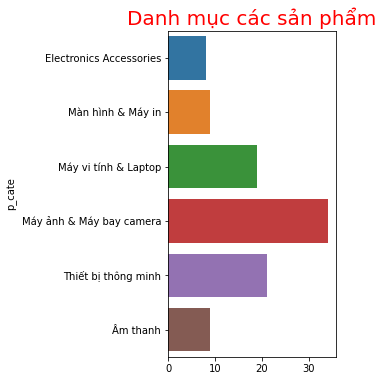

In [9]:
stat_table("p_cate", "Danh mục các sản phẩm")

Sản phẩm có giá từ 0 - dưới 10k        6.76
Sản phẩm có giá từ 10k - dưới 100k    23.89
Sản phẩm có giá từ 100k - dưới 1tr    42.28
Sản phẩm có giá từ 1tr - 10tr         18.63
Sản phẩm có giá từ trên 10tr           8.45
dtype: float64


C:\Users\lybuu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


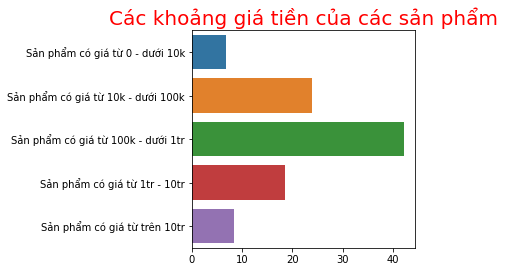

In [10]:
khoang_gia_tien_san_pham(percent, list_cate)

          Percent
p_mall           
Mall            8
Non-Mall       92


C:\Users\lybuu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


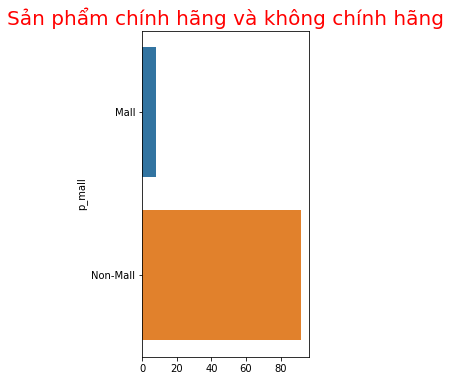

In [11]:
stat_table("p_mall","Sản phẩm chính hãng và không chính hãng")

Số lượng thương hiệu: 2131
<class 'pandas.core.series.Series'>
          Percent
p_brand          
4Tech           0
ASUS            0
Apple           1
BASEUS          0
Beego           0
...           ...
wonlex          0
xprinter        0
yoosee          3
zeblaze         0
zmi             0

[107 rows x 1 columns]


C:\Users\lybuu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


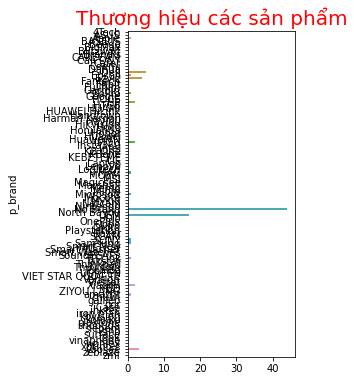

In [17]:
total_brand = data["p_brand"]
print(f"Số lượng thương hiệu: {len(total_brand)}")
stat_table("p_brand","Thương hiệu các sản phẩm")